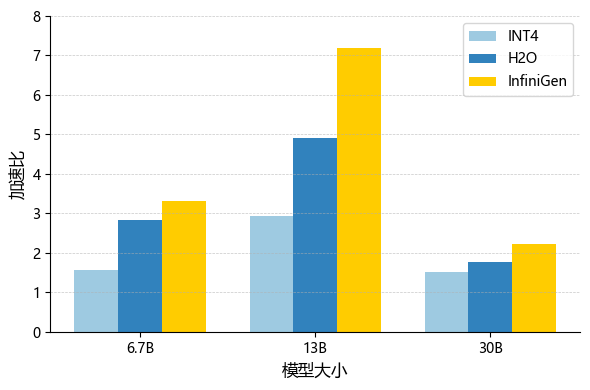

In [9]:
import re
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# 设置字体为微软雅黑
rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 中文字体
rcParams['axes.unicode_minus'] = False  # 避免负号显示为方块
# 定义函数以从文件中提取数据
def extract_data_from_log(file_path):
    data = {
        "FlexGen": [],
        "FlexGen + INT4": [],
        "FlexGen + H2O": [],
        "InfiniGen (Ours)": []
    }
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for i in range(len(lines)):
            if 'Total' in lines[i]:
                # 提取标签
                current_key = lines[i - 3].strip()
                # 提取数值
                total = float(lines[i].split(":")[1].split()[0])  # 只提取 Total 的数值部分
                data[current_key].append(total)

    return data

# 读取日志文件内容
log_file_path = "log"  # 替换为您的日志文件路径

# 提取数据
data = extract_data_from_log(log_file_path)



# 提取数据
flexgen_totals = data["FlexGen"]  # FlexGen 数据
int4_totals = data["FlexGen + INT4"]  # FlexGen + INT4 数据
h2o_totals = data["FlexGen + H2O"]  # FlexGen + H2O 数据
infinigen_totals = data["InfiniGen (Ours)"]  # InfiniGen 数据


# 计算加速比
int4_speedup = [flexgen_totals[i] / int4_totals[i] for i in range(len(flexgen_totals))]
h2o_speedup = [flexgen_totals[i] / h2o_totals[i] for i in range(len(flexgen_totals))]
infinigen_speedup = [flexgen_totals[i] / infinigen_totals[i] for i in range(len(flexgen_totals))]

# 数据
model_sizes = ["6.7B", "13B", "30B"]
int4 = int4_speedup
h2o = h2o_speedup
infinigen = infinigen_speedup

x = np.arange(len(model_sizes))
width = 0.25

# 绘图
fig, ax = plt.subplots(figsize=(6,4))

# 配色
colors = ['#9ecae1', '#3182bd', '#ffcc00']  # INT4, H2O, InfiniGen

# 柱状图
bars_int4 = ax.bar(x - width, int4, width, label="INT4", color=colors[0])
bars_h2o = ax.bar(x, h2o, width, label="H2O", color=colors[1])
bars_infinigen = ax.bar(x + width, infinigen, width, label="InfiniGen", color=colors[2])

# 标签和标题
ax.set_xlabel("模型大小", fontsize=12)
ax.set_ylabel("加速比", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(model_sizes)
ax.legend()

# 格式调整
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_ylim(0, 8)

# 显示网格线
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()
fig.savefig("16b.pdf", dpi=300)